#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [21]:
# Read CSV
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [22]:
print(df.duplicated().value_counts())

False    147
True       3
dtype: int64


In [44]:
duplicates = df[df.duplicated(subset=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], keep=False)]
duplicates

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [25]:
df.duplicated().values.any()

True

In [26]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Periksa apakah ada missing values

In [27]:
print(df.isnull().any())

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

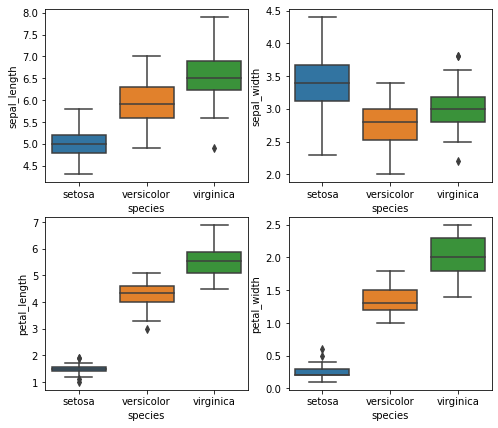

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(8,7))
sns.boxplot(x=df["species"], y=df["sepal_length"], orient='v', ax=axes[0,0])
sns.boxplot(x=df["species"], y=df["sepal_width"], orient='v', ax=axes[0,1])
sns.boxplot(x=df["species"], y=df["petal_length"], orient='v', ax=axes[1,0])
sns.boxplot(x=df["species"], y=df["petal_width"], orient='v', ax=axes[1,1])
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [30]:
#variabel independent
X = df.iloc[:, :-1].values
#variabel dependent
y = df.iloc[:, -1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [33]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [34]:
y_pred = classifier.predict(X_test)
print(y_pred)

['versicolor' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor']


In [35]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[5 0 0]
 [0 7 0]
 [0 0 3]]
Accuracy Score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [36]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [37]:
y_pred = model.predict(X_test)
print(y_pred)

['versicolor' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [38]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm2)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[5 0 0]
 [0 7 0]
 [0 0 3]]
Accuracy Score:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [39]:
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [40]:
y_pred = classifier.predict(X_test)
print(y_pred)

['versicolor' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [41]:
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm3)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[5 0 0]
 [0 7 0]
 [0 0 3]]
Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [48]:
print("Berdasarkan hasil coding, maka ketiga model (LogisticRegression, NaiveBayes, KNN) memiliki nilai akurasi yang sama, yaitu 1.0")

Berdasarkan hasil coding, maka ketiga model (LogisticRegression, NaiveBayes, KNN) memiliki nilai akurasi yang sama, yaitu 1.0
